In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [ ]:
url = 'https://www.datahubbs.com/wp-content/uploads/2017/03/timeseries.csv'
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df.head()
df

,date,sales
0,2015-01-01,106
1,2015-01-02,122
2,2015-01-03,127
3,2015-01-04,106
4,2015-01-05,89
...,...,...
725,2016-12-26,102
726,2016-12-27,120
727,2016-12-28,121
728,2016-12-29,133


In [ ]:
df.describe()


,sales
count,730.000000
mean,112.242466
std,13.666420
min,66.000000
25%,103.000000
50%,112.000000
75%,122.000000
max,150.000000


In [ ]:
dataset = df
dataset["Month"] = pd.to_datetime(df["date"]).dt.month
dataset["Year"] = pd.to_datetime(df["date"]).dt.year
dataset["Date"] = pd.to_datetime(df["date"]).dt.date
dataset["Week"] = pd.to_datetime(df["date"]).dt.week
dataset["Day"] = pd.to_datetime(df["date"]).dt.day_name()
dataset = df.set_index("date")
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,sales,Month,Year,Date,Week,Day
date,,,,,,
2015-01-01,106,1,2015,2015-01-01,1,Thursday
2015-01-02,122,1,2015,2015-01-02,1,Friday
2015-01-03,127,1,2015,2015-01-03,1,Saturday
2015-01-04,106,1,2015,2015-01-04,1,Sunday
2015-01-05,89,1,2015,2015-01-05,2,Monday


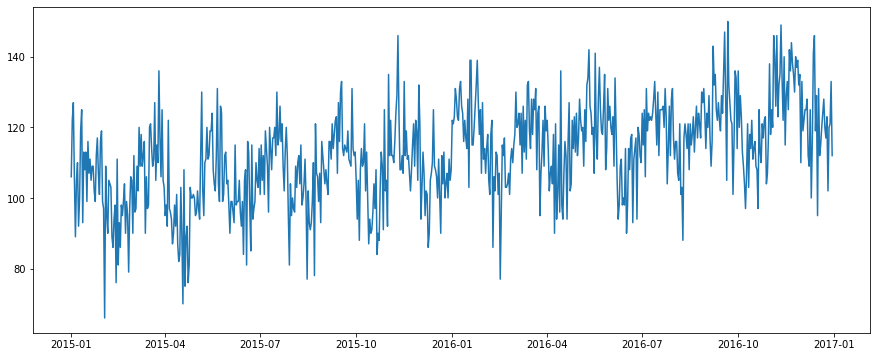

In [ ]:
plt.figure(figsize=(15,6))
plt.title='Sales'
plt.plot(df['date'], df['sales'])
plt.ylabel='Sales'
plt.xlabel= 'Date'
plt.show()


TypeError: ignored

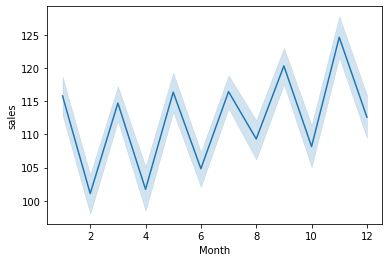

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"], y=dataset["sales"], data=df)
sns.set(rc={'figure.figsize':(18,6)})

plt.title('Sales Monthly')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Sales")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: ignored

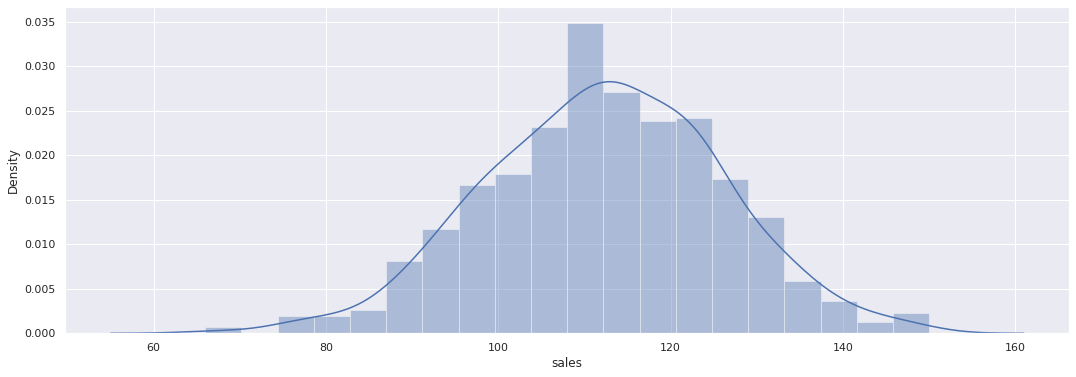

In [ ]:
sns.distplot(dataset["sales"])
plt.title("Sales Distribution")

In [ ]:
NewDataset= dataset.resample('D').mean()

In [ ]:
NewDataset.shape

(730, 4)

In [ ]:
TestData = NewDataset.tail(100)

Training_Set = NewDataset.iloc[:,0:1]

Training_Set = Training_Set[:-100]

In [ ]:
Training_Set

,sales
date,
2015-01-01,106
2015-01-02,122
2015-01-03,127
2015-01-04,106
2015-01-05,89
...,...
2016-09-17,136
2016-09-18,147
2016-09-19,128


In [ ]:
TestData

,sales,Month,Year,Week
date,,,,
2016-09-22,132,9,2016,38
2016-09-23,127,9,2016,38
2016-09-24,122,9,2016,38
2016-09-25,121,9,2016,38
2016-09-26,101,9,2016,39
...,...,...,...,...
2016-12-26,102,12,2016,52
2016-12-27,120,12,2016,52
2016-12-28,121,12,2016,52


In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (630, 1)
Test Set Shape  (100, 4)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [ ]:
Train

array([[0.47619048],
       [0.66666667],
       [0.72619048],
       [0.47619048],
       [0.27380952],
       [0.46428571],
       [0.52380952],
       [0.30952381],
       [0.4047619 ],
       [0.63095238],
       [0.70238095],
       [0.32142857],
       [0.55952381],
       [0.5       ],
       [0.55952381],
       [0.39285714],
       [0.5952381 ],
       [0.48809524],
       [0.53571429],
       [0.46428571],
       [0.51190476],
       [0.51190476],
       [0.42857143],
       [0.39285714],
       [0.54761905],
       [0.60714286],
       [0.48809524],
       [0.41666667],
       [0.5952381 ],
       [0.63095238],
       [0.39285714],
       [0.36904762],
       [0.        ],
       [0.51190476],
       [0.3452381 ],
       [0.28571429],
       [0.46428571],
       [0.45238095],
       [0.44047619],
       [0.27380952],
       [0.23809524],
       [0.33333333],
       [0.38095238],
       [0.11904762],
       [0.53571429],
       [0.17857143],
       [0.32142857],
       [0.238

In [ ]:
X_Train = []
Y_Train = []
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59
    X_Train.append(Train[i-60:i])
    
    # Y Would be 100 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(570, 60, 1)
(570, 1)


In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(570, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 25, batch_size = 8)

Epoch 1/25
72/72 [==============================] - 13s 89ms/step - loss: 0.0820
Epoch 2/25
72/72 [==============================] - 7s 94ms/step - loss: 0.0260
Epoch 3/25
72/72 [==============================] - 7s 95ms/step - loss: 0.0241
Epoch 4/25
72/72 [==============================] - 7s 96ms/step - loss: 0.0228
Epoch 5/25
72/72 [==============================] - 6s 90ms/step - loss: 0.0197
Epoch 6/25
72/72 [==============================] - 6s 89ms/step - loss: 0.0193
Epoch 7/25
72/72 [==============================] - 6s 90ms/step - loss: 0.0224
Epoch 8/25
72/72 [==============================] - 6s 89ms/step - loss: 0.0188
Epoch 9/25
72/72 [==============================] - 7s 91ms/step - loss: 0.0208
Epoch 10/25
72/72 [==============================] - 6s 89ms/step - loss: 0.0183
Epoch 11/25
72/72 [==============================] - 6s 88ms/step - loss: 0.0175
Epoch 12/25
72/72 [==============================] - 6s 89ms/step - loss: 0.0198
Epoch 13/25
72/72 [=================

In [ ]:
TestData.head()

,sales,Month,Year,Week
date,,,,
2016-09-22,132,9,2016,38
2016-09-23,127,9,2016,38
2016-09-24,122,9,2016,38
2016-09-25,121,9,2016,38
2016-09-26,101,9,2016,39


In [ ]:
NewDataset.head()

,sales,Month,Year,Week
date,,,,
2015-01-01,106,1,2015,1
2015-01-02,122,1,2015,1
2015-01-03,127,1,2015,1
2015-01-04,106,1,2015,1
2015-01-05,89,1,2015,2


In [ ]:
TestData.shape


(100, 4)

In [ ]:
NewDataset.shape

(730, 4)

In [ ]:
Df_Total = pd.concat((NewDataset[["sales"]], TestData[["sales"]]), axis=0)

In [ ]:
Df_Total.shape

(830, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# Reshape
inputs = inputs.reshape(-1,1)

# Normalize
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    

X_test = np.array(X_test)


X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted= regressor.predict(X_test)


predicted= sc.inverse_transform(predicted)

In [ ]:
True_Demand = TestData["sales"].to_list()
Predicted_Demand  = predicted
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueDemand": True_Demand,
    "PredictedDemand":[x[0] for x in Predicted_Demand]
    })
Machine_Df

,Date,TrueDemand,PredictedDemand
0,2016-09-22,132,122.144524
1,2016-09-23,127,122.436096
2,2016-09-24,122,122.761208
3,2016-09-25,121,123.111252
4,2016-09-26,101,123.330101
...,...,...,...
95,2016-12-26,102,121.063286
96,2016-12-27,120,121.387787
97,2016-12-28,121,121.662247
98,2016-12-29,133,121.837074


In [ ]:
True_Demand = TestData["sales"].to_list()
Predicted_Demand  = [x[0] for x in Predicted_Demand ]
dates = TestData.index.to_list()

In [ ]:
Predicted_Demand

[122.14452,
 122.4361,
 122.76121,
 123.11125,
 123.3301,
 123.39454,
 123.328064,
 123.23192,
 123.34907,
 123.452576,
 123.642586,
 123.83169,
 124.08067,
 124.3001,
 124.34069,
 124.196846,
 123.7365,
 122.95654,
 121.966934,
 120.903244,
 119.8459,
 118.857956,
 118.02825,
 117.40678,
 116.93308,
 116.53532,
 116.277374,
 116.09543,
 115.95743,
 115.737724,
 115.59298,
 115.5164,
 115.5406,
 115.68998,
 115.97188,
 116.40494,
 116.984924,
 117.51225,
 117.85359,
 118.06105,
 118.40641,
 118.76385,
 119.17365,
 119.683914,
 120.42332,
 121.34563,
 122.28982,
 123.24099,
 124.085754,
 124.75655,
 125.28582,
 125.81385,
 126.303925,
 126.615425,
 126.80372,
 126.754906,
 126.49697,
 126.1096,
 125.614784,
 125.146484,
 124.73751,
 124.40317,
 124.15595,
 123.91782,
 123.593704,
 123.22194,
 122.72593,
 122.1834,
 121.68862,
 121.24398,
 120.61446,
 119.9836,
 119.30974,
 118.65501,
 118.04506,
 117.503876,
 117.07794,
 116.664406,
 116.12032,
 115.56813,
 115.04482,
 114.441605,
 114.

TypeError: ignored

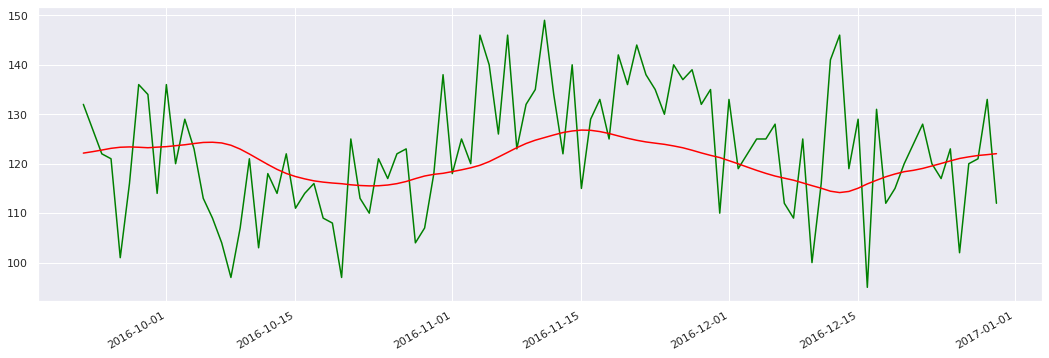

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_Demand

y1 = Predicted_Demand

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")



plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Sales")
plt.title("Predicted Future Demand")
plt.legend()

In [ ]:
from statsmodels.tools.eval_measures import rmse
rmse_error = rmse(TestData['sales'], Predicted_Demand)
mse_error = rmse_error**2
mean_value = TestData['sales'].mean()
mape = np.mean(np.abs((Predicted_Demand - TestData['sales']) / TestData['sales'])) * 100

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
rmse_error

11.825668306920113

In [ ]:
mape

7.662148988886187